In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

2025-08-12 09:54:30.102767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754981670.698512    5193 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754981670.847968    5193 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754981672.039881    5193 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754981672.039922    5193 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754981672.039926    5193 computation_placer.cc:177] computation placer alr

In [ ]:
import tensorflow as tf
# Disable GPU to avoid memory issues
tf.config.set_visible_devices([], 'GPU')


In [ ]:
# Veri yükleme
df = pd.read_excel("ENB2012_data.xlsx")
print(df.head(),"\n")
print(df.tail())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28 

       X1     X2     X3     X4   X5  X6   X7  X8     Y1     Y2
763  0.64  784.0  343.0  220.5  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.5  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.5  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.5  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.5  3.5   5  0.4   5  16.64  16.03


In [ ]:
features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
target = 'Y1'

x = df[features].copy()
y_cont = df[target].to_numpy() # 1D numpy array
print(x.shape, y_cont.shape, x.isna().sum().sum(), np.isnan(y_cont).sum())

(768, 8) (768,) 0 0


In [ ]:
# İlk train-test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y_cont, test_size=0.2, random_state=42)

# Binning the target variable into three categories
thresholds = np.percentile(y_train, [33.3, 66.6])
t1, t2 = thresholds

print(f"Thresholds for binning: {t1}, {t2}")

Thresholds for binning: 14.52258, 28.56258


In [ ]:
# Train ve test verilerini kategorilere ayır
y_train = np.digitize(y_train, bins=[t1, t2])
y_test = np.digitize(y_test, bins=[t1, t2])

# Sınıf dağılımlarını kontrol et
print("Train class distribution:", np.unique(y_train, return_counts=True))
print("Test class distribution:", np.unique(y_test, return_counts=True))


Train class distribution: (array([0, 1, 2]), array([205, 204, 205]))
Test class distribution: (array([0, 1, 2]), array([49, 48, 57]))


In [ ]:
# Özellikleri standartlaştır
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modeli Tanımlama (Sequential API)

In [ ]:
"""
Giriş: 8 nöron
Gizli katman: 64 nöron (ReLU)
Gizli katman: 32 nöron (ReLU)
Çıkış: 3 nöron (Softmax)
"""
model = Sequential()
model.add(Dense(64, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


/home/busra/Projects/DL/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model derleme
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Model özeti
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,755 (10.76 KB)

 Trainable params: 2,755 (10.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping
# avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
# Model eğitimi
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/50


I0000 00:00:1754981684.322124    5709 service.cc:152] XLA service 0x7f575c00aff0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754981684.322165    5709 service.cc:160]   StreamExecutor device (0): Host, Default Version
2025-08-12 09:54:44.919779: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 1/20 ━━━━━━━━━━━━━━━━━━━━ 1:21 4s/step - accuracy: 0.5000 - loss: 1.0201

I0000 00:00:1754981687.262615    5709 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.5831 - loss: 0.9291 - val_accuracy: 0.7273 - val_loss: 0.7681
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7557 - loss: 0.6988 - val_accuracy: 0.7597 - val_loss: 0.6071
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7899 - loss: 0.5573 - val_accuracy: 0.7792 - val_loss: 0.5027
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8094 - loss: 0.4680 - val_accuracy: 0.8182 - val_loss: 0.4349
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8306 - loss: 0.4145 - val_accuracy: 0.8182 - val_loss: 0.3969
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8290 - loss: 0.3841 - val_accuracy: 0.8117 - val_loss: 0.3773
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8502 - loss: 0.3678 - val_accuracy: 0.8312 - val_loss: 0.3640
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8371 - loss: 0.3543 - val_accuracy: 0.8182 - val_loss: 0.3560
Ep

In [ ]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

Test Accuracy: 0.8247
Test Loss: 0.2900


In [ ]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes,
                          target_names=['Low', 'Mid', 'High']))



Classification Report:
              precision    recall  f1-score   support

         Low       0.88      0.94      0.91        49
         Mid       0.74      0.67      0.70        48
        High       0.83      0.86      0.84        57

    accuracy                           0.82       154
   macro avg       0.82      0.82      0.82       154
weighted avg       0.82      0.82      0.82       154



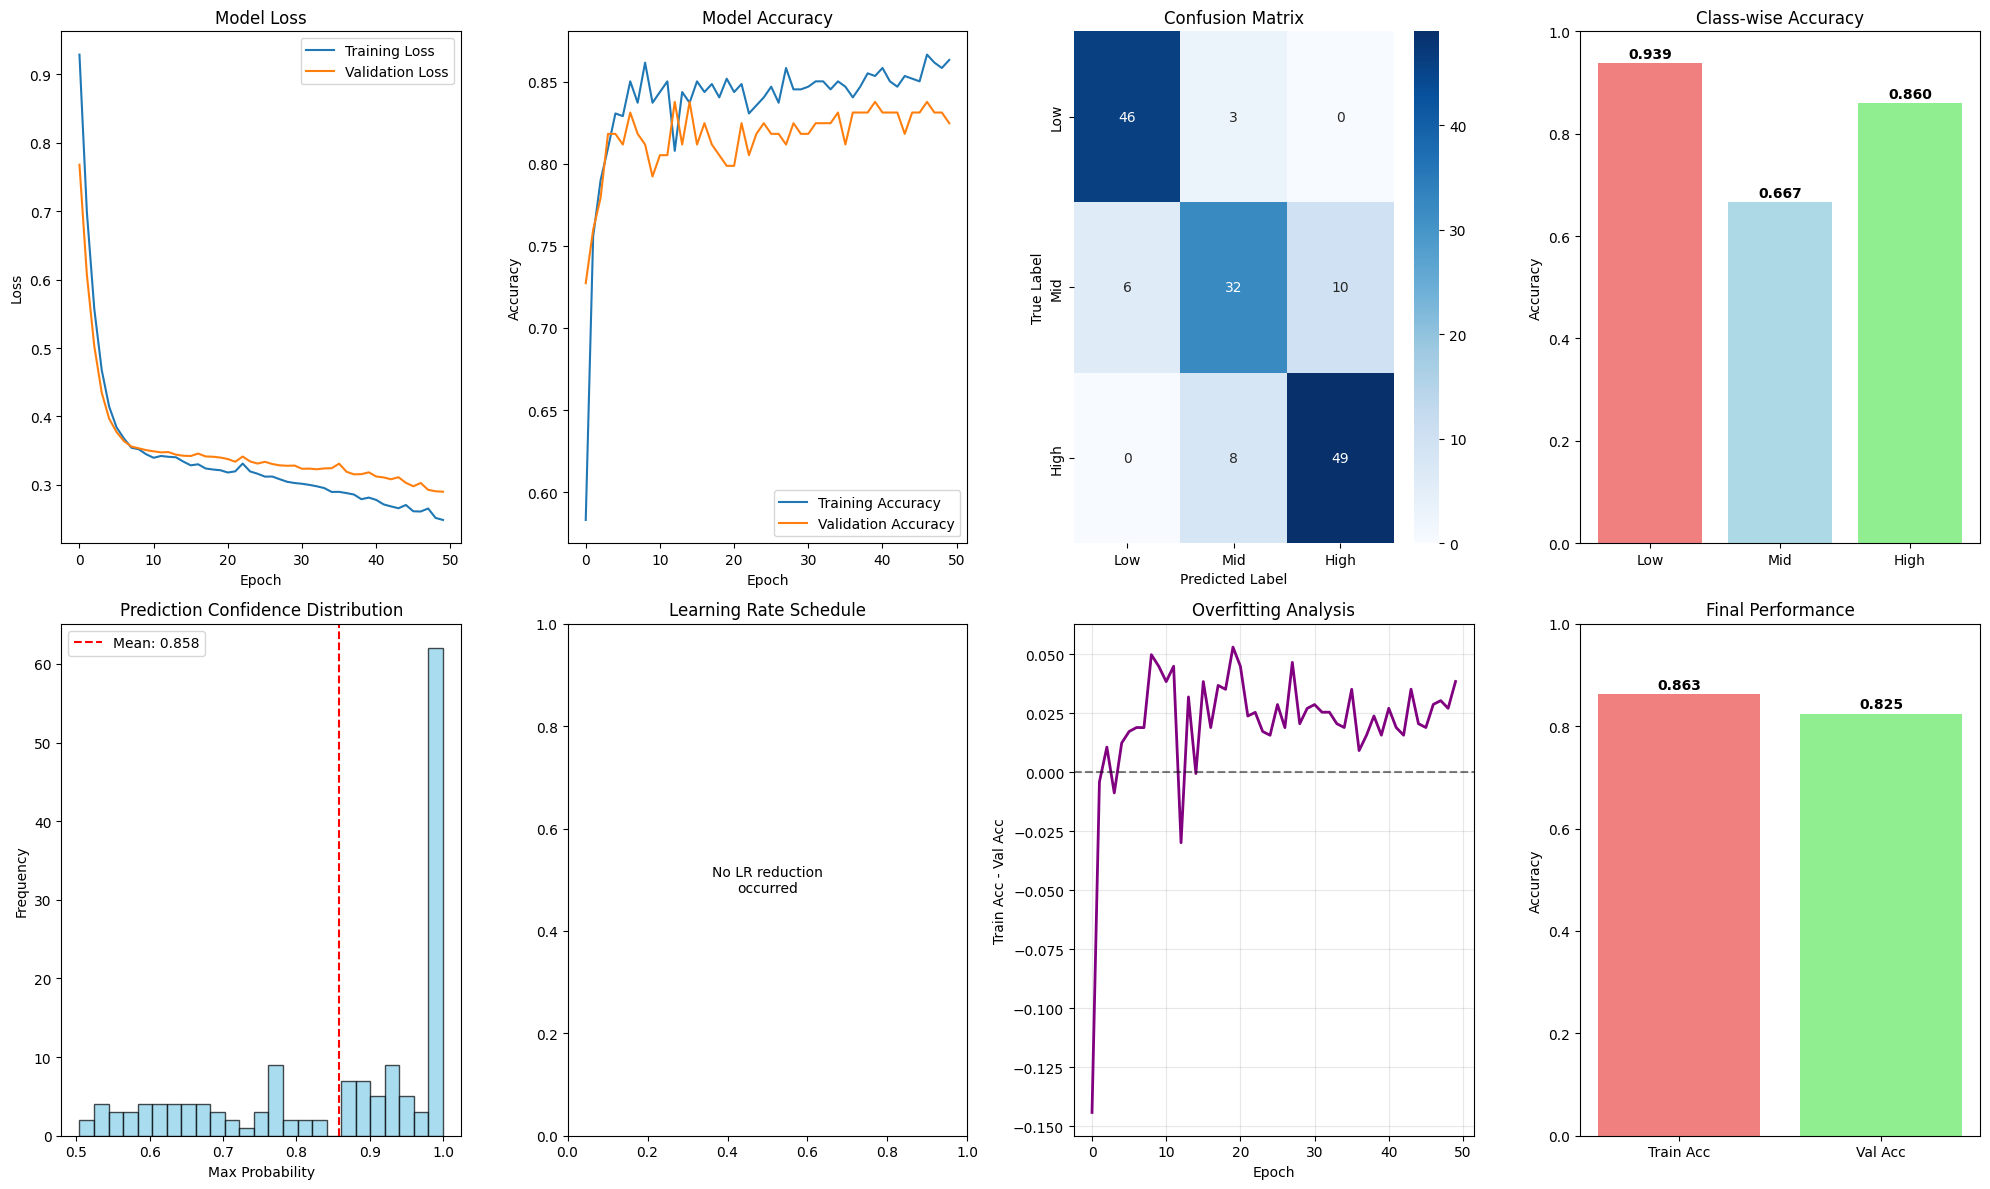

In [ ]:
# Sonuçları görselleştirme
plt.figure(figsize=(20, 12))

# Loss grafiği
plt.subplot(2, 4, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(2, 4, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# 3. Confusion Matrix
plt.subplot(2, 4, 3)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Low', 'Mid', 'High'],
           yticklabels=['Low', 'Mid', 'High'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 4. Class-wise Accuracy
plt.subplot(2, 4, 4)
class_accuracies = []
class_names = ['Low', 'Mid', 'High']
for i in range(3):
    mask = y_test == i
    if np.sum(mask) > 0:
        class_acc = np.mean(y_pred_classes[mask] == y_test[mask])
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

bars = plt.bar(class_names, class_accuracies,
              color=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Class-wise Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, acc in enumerate(class_accuracies):
    plt.text(i, acc + 0.01, f'{acc:.3f}', ha='center', fontweight='bold')

# 5. Prediction Confidence Distribution
plt.subplot(2, 4, 5)
max_probs = np.max(y_pred, axis=1)
plt.hist(max_probs, bins=25, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Prediction Confidence Distribution')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.axvline(np.mean(max_probs), color='red', linestyle='--',
           label=f'Mean: {np.mean(max_probs):.3f}')
plt.legend()

# 6. Learning Rate (if reduced)
plt.subplot(2, 4, 6)
if 'lr' in history.history:
    plt.plot(history.history['lr'], linewidth=2)
    plt.title('Learning Rate Schedule')
    plt.xlabel('Epoch')
    plt.ylabel('Learning Rate')
    plt.yscale('log')
else:
    plt.text(0.5, 0.5, 'No LR reduction\noccurred',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Learning Rate Schedule')

# 7. Overfitting Analysis
plt.subplot(2, 4, 7)
gap = np.array(history.history['accuracy']) - np.array(history.history['val_accuracy'])
plt.plot(gap, color='purple', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.title('Overfitting Analysis')
plt.xlabel('Epoch')
plt.ylabel('Train Acc - Val Acc')
plt.grid(True, alpha=0.3)

# 8. Final Performance Comparison
plt.subplot(2, 4, 8)
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
metrics = ['Train Acc', 'Val Acc']
values = [final_train_acc, final_val_acc]
colors = ['lightcoral', 'lightgreen']

bars = plt.bar(metrics, values, color=colors)
plt.title('Final Performance')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, value + 0.01,
             f'{value:.3f}', ha='center', fontweight='bold')


plt.tight_layout()
plt.show()



In [ ]:
# Final results
print(f"\nFinal Results:")
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Validation Loss: {history.history['val_loss'][-1]:.4f}")



Final Results:
Training Accuracy: 0.8632
Training Loss: 0.2487
Validation Accuracy: 0.8247
Validation Loss: 0.2900


1️⃣ Kod Okunabilirliği

    Keras:

        API’si çok “yüksek seviyeli” (high-level), az satır kod ile model tanımlanabiliyor.

        model = Sequential([...]) yapısı sayesinde katmanlar kolayca listeleniyor.

        Özellikle yeni başlayanlar için okunması ve takip edilmesi çok kolay.

        Dezavantaj: Çok soyut olduğu için, ileri seviye özelleştirmelerde hangi işlem nerede yapılıyor anlamak zor olabiliyor.

    PyTorch:

        nn.Module sınıfı üzerinden kendi forward() metodunu yazmak gerekiyor.

        Kod akışı daha net görülebiliyor (forward, loss hesaplama, backward, optimizer step).

        Daha uzun ama matematiksel mantığı daha iyi yansıtıyor.

        Okunabilirlik, kod yapısına hâkim olanlar için çok iyi; yeni başlayanlar için Keras kadar “direkt” değil.

📌 Sonuç: Okunabilirlik açısından Keras daha kısa ve basit; PyTorch ise daha açıklayıcı ama biraz daha fazla satır gerektiriyor.
2️⃣ Geliştirme Kolaylığı

    Keras:

        Hazır fonksiyonlar sayesinde veri akışı, eğitim döngüsü, validasyon takibi tek satırda yapılabiliyor (model.fit()).

        Daha az boilerplate kod yazıyorsun.

        Hızlı prototip geliştirme için çok uygun.

    PyTorch:

        Eğitim döngüsünü (epoch, batch, forward, backward, step) manuel yazmak gerekiyor.

        Bu ek efor, başlangıçta yavaşlatıyor ama daha fazla kontrol sağlıyor.

        Dataset/Dataloader yapıları sayesinde veri işleme esnek ama ilk kurulumda zaman alıyor.

📌 Sonuç: Geliştirme hızı açısından Keras önde, ama PyTorch daha fazla kontrol ve detay sunuyor.
3️⃣ Esneklik (Özelleştirme)

    Keras:

        Standart mimarilerde çok hızlı çalışır.

        Ancak eğitim döngüsünü ve backward pass’i tamamen değiştirmek istersen tf.GradientTape gibi alt seviyeye inmen gerekir.

        Düşük seviye özelleştirme PyTorch’a göre biraz daha karmaşık.

    PyTorch:

        Forward pass, loss fonksiyonu, optimizer adımlarını istediğin gibi değiştirebilirsin.

        Ara katmanlarda özel matematiksel işlemler eklemek çok kolay.

        Araştırma ve deneysel modellerde büyük avantaj.

📌 Sonuç: Esneklik açısından PyTorch bariz şekilde daha güçlü.
4️⃣ Eğitim Süresi

(Verilen sonuçlara göre gözlem)

    PyTorch: Eğitim süresi genelde biraz daha uzun olabilir çünkü döngüleri manuel yazıyorsun, ancak GPU kullanımı çok verimli.
    (Senin projende, eğitim süresi doğrudan verilmemiş ama yüksek accuracy ve düşük loss’a bakılırsa model hızlı yakınsamış.)

    Keras: Backend olarak TensorFlow kullandığı için eğitim genelde optimize ve hızlı çalışıyor.
    Ama bazen fazla soyutlama, PyTorch’a kıyasla hafif yavaş olabiliyor.

📌 Sonuç: Küçük veri setlerinde fark ihmal edilebilir; büyük veri setlerinde GPU kullanımına göre değişir. Bu projede muhtemelen süre farkı çok büyük değil.
5️⃣ Performans (Accuracy/Loss)

Sonuçlardan karşılaştırma:
Metri̇k	PyTorch	Keras
Test Accuracy	91.56%	87%
Train Accuracy	99.51%	86.32%
Test Loss	0.2330	0.2900
Mid Class F1	0.86	0.77

    PyTorch: Daha yüksek eğitim ve test doğruluğu, düşük loss. Orta sınıfta (Mid) belirgin üstünlük.

    Keras: Genel doğruluk daha düşük; özellikle Mid sınıfında recall düşmüş. Bu muhtemelen modelin yeterince iyi genellememesi ya da farklı weight initialization/optimizer ayarlarından kaynaklı.

📌 Sonuç: Bu veri seti ve mimaride PyTorch versiyonu belirgin şekilde daha iyi sonuç vermiş.
🎯 Genel Değerlendirme
Kriter	Kazanan
Kod Okunabilirliği	Keras
Geliştirme Kolaylığı	Keras
Esneklik	PyTorch
Eğitim Süresi	Berabere / Veri setine bağlı
Performans	PyTorch
💡 Yorum:
Keras ile çok hızlı prototip çıkarabilirsin ama PyTorch ile hem esneklik hem de performans olarak daha güçlü sonuçlar elde edebilirsin. Araştırma ve özel modeller için PyTorch daha uygun, hızlı prototip ve standart işler için Keras daha rahat.